<a href="https://colab.research.google.com/github/shuhei0916/new-ai/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import preprocessing
from keras.utils import to_categorical
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 入力データ
scaler = preprocessing.StandardScaler() # 標準化のためのスケーラー
scaler.fit(iris.data) # 変換のためのパラメータを計算
x = scaler.transform(iris.data) # データの変換
print(x[:10])

# 正解データ
t = to_categorical(iris.target) # ラベルをone-hot表現に変換
print(t[:10])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train:訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力の数は4、ニューロン数は32
model.add(Activation('relu')) # 活性化関数(ReLU)を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数(ReLU)を追加
model.add(Dense(3)) # 3つに分類するので、ニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用（？？？）
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # モデルのコンパイル

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5

In [11]:
# 4.2.6 学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.9018
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 0.3063 - accuracy: 0.8929
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.9107
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.9107
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.9107
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2838 - accuracy: 0.9286
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2786 - accuracy: 0.9286
Epoch 8/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.9196
Epoch 9/30
14/14 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.9286
Epoch 10/30
14/14 [==============================] - 0s 6ms/step - loss: 0.2651 - accuracy: 0.9286
Epoch 11/30
14/14 [

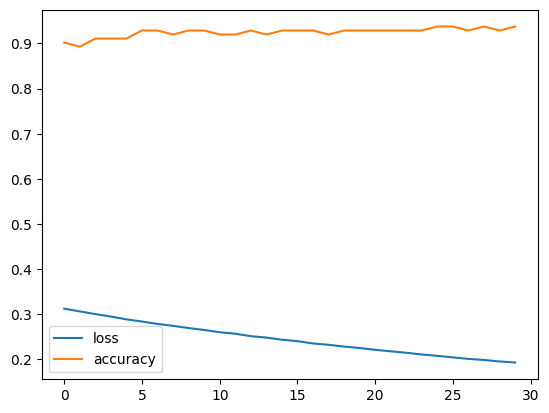

In [13]:
# 4.2.7 学習の推移
import matplotlib.pyplot as plt

hist_loss = history.history['loss'] # 訓練用データの誤差
hist_acc = history.history['accuracy'] # 訓練用データの精度（正解率）
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss') # 誤差
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy') # 精度（正解率）
plt.legend()
plt.show()

# 教科書のグラフと違い、なぜか最初から精度が高い（笑）